Nie wiem, czy poprawnie wykonałam - ale bawiłam się w tym zadaniu, sprawiło mi ogromną przyjemność.
Bawiłam się danymi, ale ...wszystko po kolei :)
Zapraszam do opowieści :)

# Eksploracyjna analiza danych

In [1]:
import pandas as pd
pingwiny = pd.read_csv('penguins.csv')
pingwiny

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [2]:
pingwiny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [3]:
pingwiny.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [4]:
pingwiny[pingwiny['CulmenLength'].isnull()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


### Komentarz:
Powyższe dwie obserwacje nie mają danych, jedynie klasę.
Mam trzy wyjścia: zostawić jak jest, usunąć te wiersze lub uzupełnić (np. średnią).
Wybieram usunięcie, ponieważ wg mnie wnoszą za mało (tylko zwiększają liczebność klas), a mogą psuć obraz modelu jako wartości odstające. Są to dwie obserwacje z 344 - mają więc niewielki udział we wszystkich danych.

In [5]:
pingwiny.dropna(inplace = True)

In [6]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']

target = 'Species'
X, y = pingwiny[features], pingwiny[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

In [7]:
# sprawdzam, czy klasy są zbalansowane. Nie są.

pd.Series(y).value_counts(normalize=True)

0    0.441520
1    0.359649
2    0.198830
Name: Species, dtype: float64

In [8]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Unique values: 164


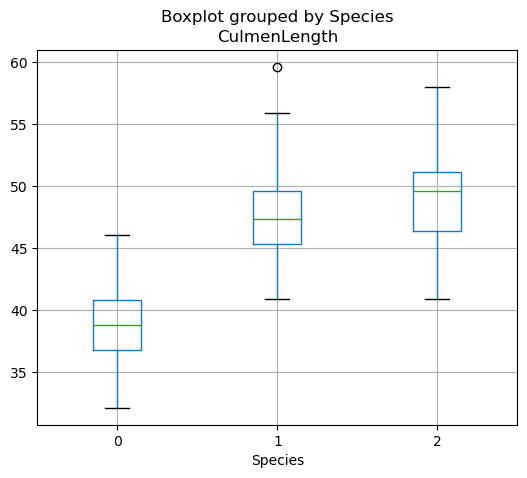

Unique values: 80


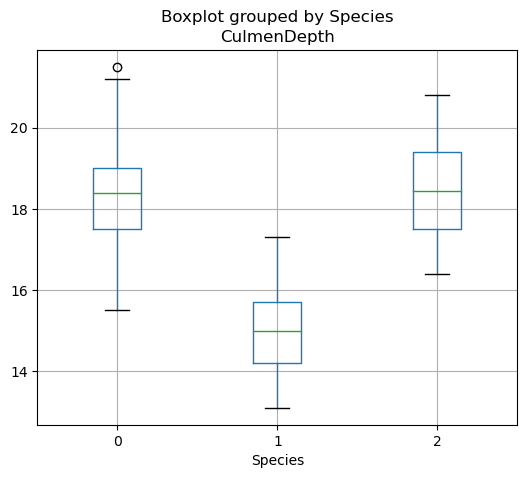

Unique values: 55


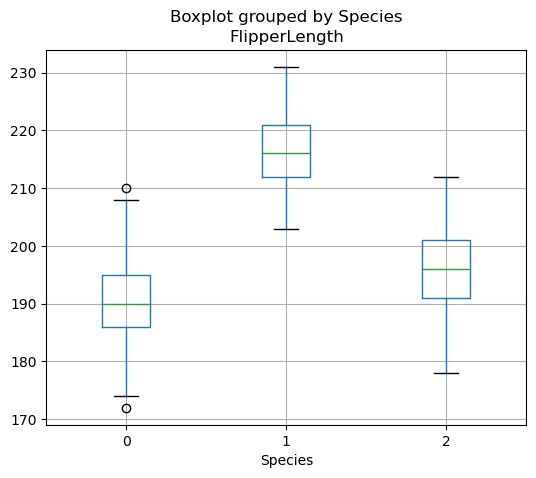

Unique values: 94


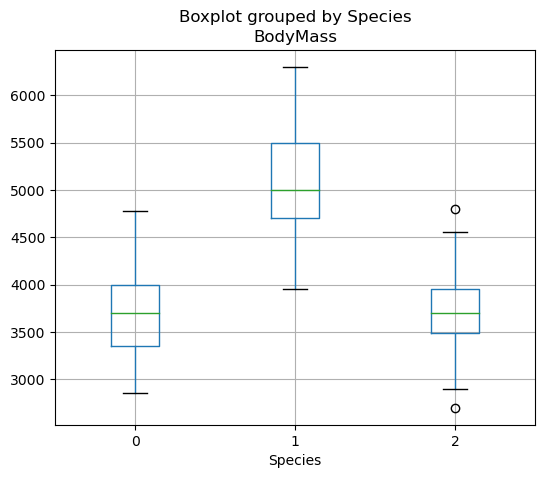

In [9]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(pingwiny[col].unique())}')
    pingwiny.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

### Komentarz:
CulmenLenght i FlipperLength najlepiej tłumaczą podział na gatunki, szczególnie wspólnie.W przypadku CulmenLenght mocno zbliżone do siebie są wartości gatunku 1 i 2. Tutaj z pomocą przyjdzie cecha "FlipperLength", dla której wartości cechy dla klasy 1 i 2 różnią się bardzo (natomiast wartości dla gatunków 0 i 2 są podobne). Czasami wartości niektórych cech w ramach gatunków pokrywają się (np. wartość "BodyMass" gatunku 2 zawiera się w gatunku 0, za to wyraźnie rozdziela je od gatunku 1). Na ten moment uważam, że w ramach budowania modelu należy użyć wszystkich tych cech.

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1659981201.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pingwiny.loc[pingwiny['Species']==0, col], kde=True, color='yellow', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1659981201.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

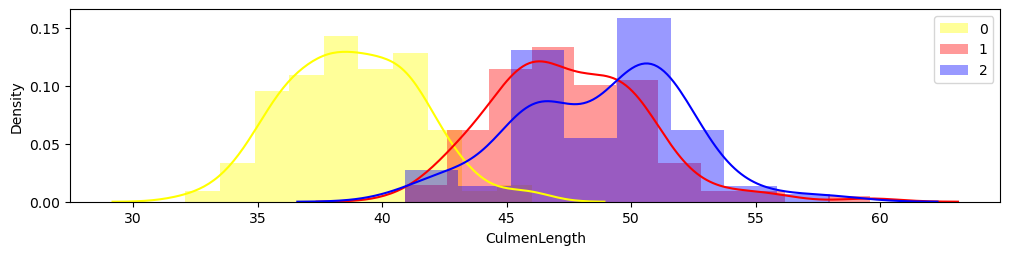

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1659981201.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pingwiny.loc[pingwiny['Species']==0, col], kde=True, color='yellow', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1659981201.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

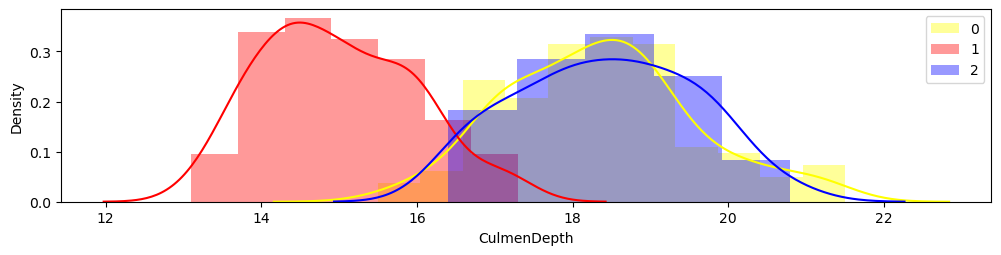

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1659981201.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pingwiny.loc[pingwiny['Species']==0, col], kde=True, color='yellow', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1659981201.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

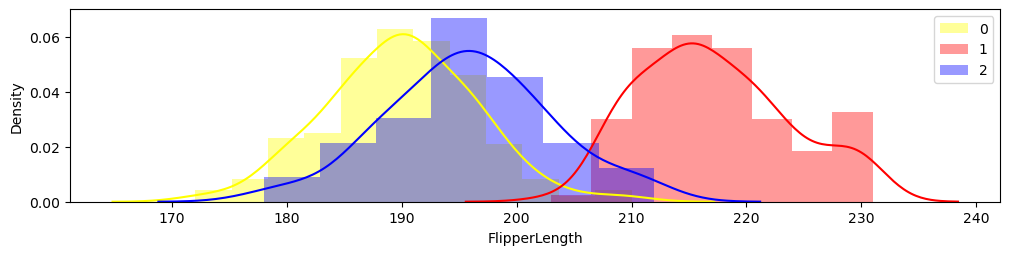

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1659981201.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pingwiny.loc[pingwiny['Species']==0, col], kde=True, color='yellow', label='0')
C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1659981201.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

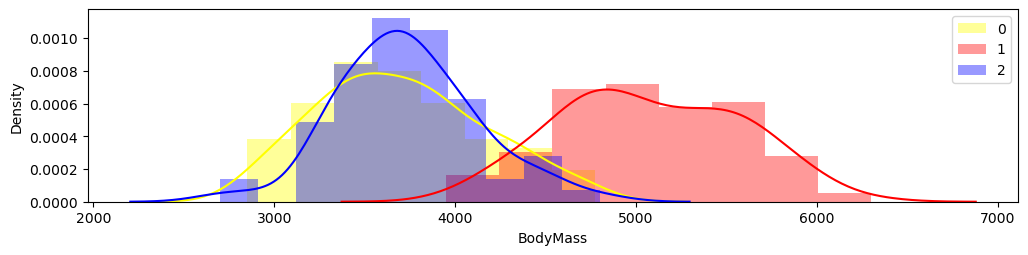

In [10]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(pingwiny.loc[pingwiny['Species']==0, col], kde=True, color='yellow', label='0')
    sns.distplot(pingwiny.loc[pingwiny['Species']==1, col], kde=True, color='red', label='1')
    sns.distplot(pingwiny.loc[pingwiny['Species']==2, col], kde=True, color='blue', label='2')
    plt.legend(loc='upper right')
    plt.show()

### Komentarz:
Powyższe wykresy utwierdziły mnie we wcześniejszych wnioskach. W niektórych cechach klasy pokrywają się. Jednak w ramach różnych cech - pary cech wartości pokrywających się są różne (czasem pokrywają się klasy 0 i 2, czasem klsay 1 i 2).

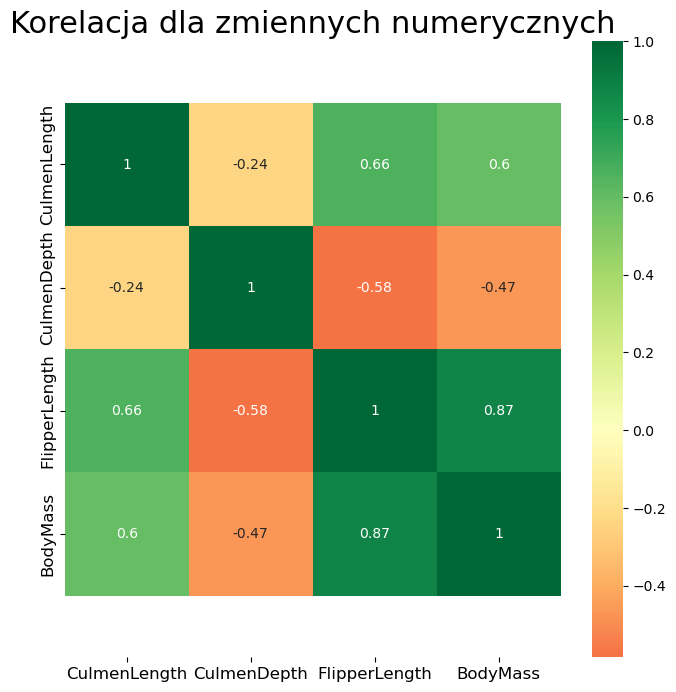

In [11]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Komentarz:
Wartości są ze sobą skorelowane mocno (CulmenDepth ujemnie z BodyMass i FlipperLength) lub bardzo mocno (FlipperLength dodatnio z BodyMass). Na ten moment zostawiam wszystko jak jest i sprawdzam, co z tego wyniknie.

In [12]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779857
FlipperLength    0.357472
BodyMass         0.209717
CulmenDepth     -0.183090
dtype: float64

### Komentarz:
Przynależność do gatunku najbardziej jest zależna od CulmenLength.

# Podział danych na treningowe i testowe. Standaryzacja danych.

In [13]:
# PODZIAŁ DANYCH - WERSJA MENTORSKA - NIE DZIAŁA. Dane treningowe i testowe mają po dwie różne klasy. Treningowe: 0 i 1, a wyjsciowe: 1 i 2 
# X_train = X[:120]
# X_test = X[120:]
# y_train = y[:120]
# y_test = y[120:]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)


Treningowe obserwacje: 239
Testowe obserwacje: 103


# Utworzenie metrics_dataframe do sprawdzania metryk

In [14]:
#### Podkładka pochodzi z materiałów - dla modeli binarnych. Udało mi się ją zmodyfikować na modele z trzema klasami !!!!!
#### oraz dorzucić do niego więcej metryk (w materiałach były one obliczane osobno). Szczególnie jestem zadowolona,że udało
#### mi się wrzucić tutaj F1 treningowe w rozróżnieniu na to, czy model potrzebuje danych standaryzowanych, czy nie
#### (w tym celu odkryłam i użyłam z powodzeniem np.all() ).
#### JAKA JA JESTEM DUMNA Z TEGO,CO TUTAJ DOKONAŁAM.



from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'F1_score train', 'AUC','Accuracy','Precision','Recall'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    if np.all(X_checked == X_test):
        predictions_train = model.predict(X_train)
    else:
        predictions_train = model.predict(X_train_standardized)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba, pos_label=1)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions, average = 'weighted')
    f1_metric_train = f1_score(y_train, predictions_train, average = 'weighted')
    accuracy_metric = accuracy_score(y_test, predictions)
    precision_metric = precision_score(y_test, predictions, average = 'weighted')
    recall_metric = recall_score(y_test, predictions, average = 'weighted')
    auc_metric = roc_auc_score(y_checked, predictions_proba, multi_class = 'ovo')
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},
                                                 ignore_index=True)
    return metrics_dataframe

# TRENOWANIE MODELI

## LogisticRegression

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



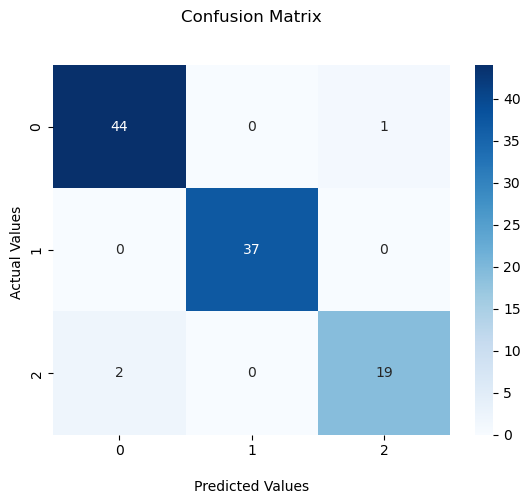

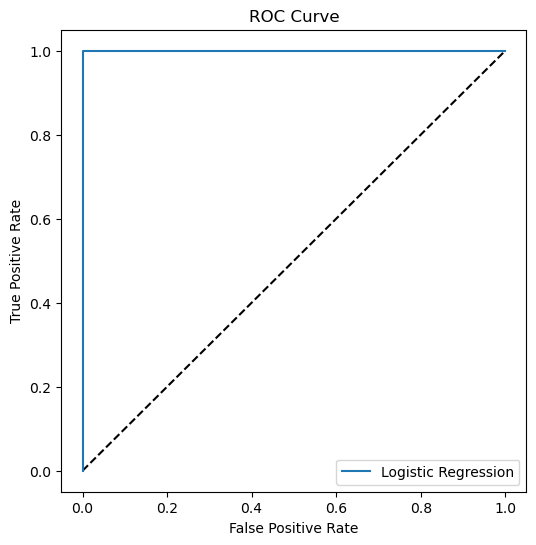

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\963171507.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.970679,0.995803,0.999295,0.970874,0.97081,0.970874


In [15]:
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

### Komentarz:
Model jest świetny. F1 treningowe (=1) mogołoby wskazywać na przetrenowanie modelu - gdyby nie to, że F1 testowe jest bliskie temu ideałowi, tzn. wynosi 0.98. Podejrzewam, że wpływa na to korelacja cech. Można to wykorzystać i zmniejszyć udział danych treningowych (nie zawsze mamy dostęp do dużej bazy danych, a skuteczne modelowanie na podstawie mniejszej próby jest, podejrzewam, cenne).  Sprawdzam, jak zamiana test_size z 0.3 na  ...0.9 wpłynie na model.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0,  stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

############## ponownie definiuję calculate_metrics dla nowego podziału danych

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'F1_score train', 'AUC','Accuracy','Precision','Recall'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    if np.all(X_checked == X_test):
        predictions_train = model.predict(X_train)
    else:
        predictions_train = model.predict(X_train_standardized)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba, pos_label=1)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions, average = 'weighted')
    f1_metric_train = f1_score(y_train, predictions_train, average = 'weighted')
    accuracy_metric = accuracy_score(y_test, predictions)
    precision_metric = precision_score(y_test, predictions, average = 'weighted')
    recall_metric = recall_score(y_test, predictions, average = 'weighted')
    auc_metric = roc_auc_score(y_checked, predictions_proba, multi_class = 'ovo')
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},
                                                 ignore_index=True)
    return metrics_dataframe

Treningowe obserwacje: 34
Testowe obserwacje: 308


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       136
           1       1.00      1.00      1.00       111
           2       0.98      0.97      0.98        61

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



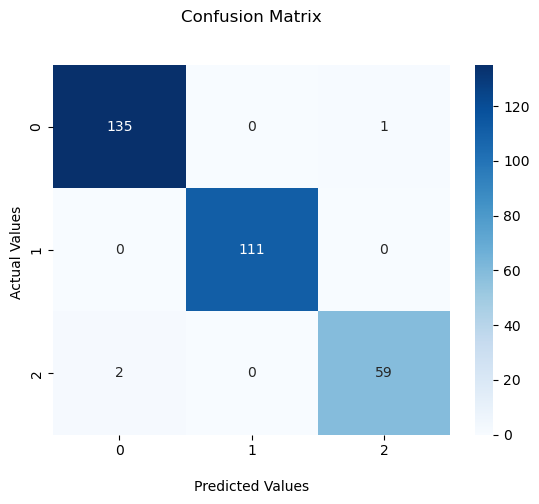

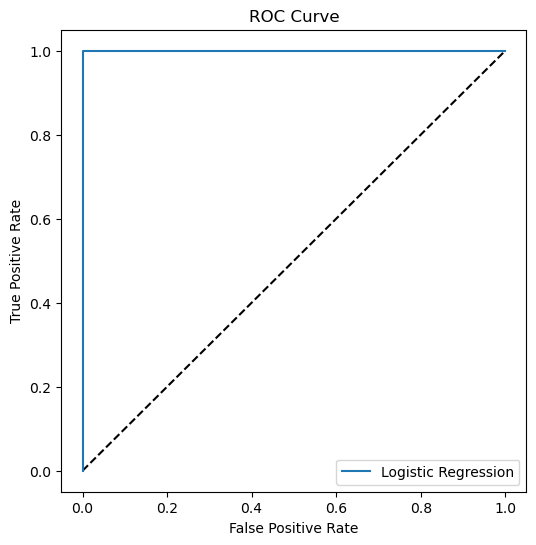

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.990237,0.969931,0.999578,0.99026,0.990253,0.99026


In [17]:
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

### Komentarz: Jest świetnie. Pamiętam, że cechy są ze sobą skorelowane, czyli,że niosą ze sobą te same informacje. Z czterech odrzucę dwie i zostawię te, które wnoszą najwięcej informacji. Powtórzę proces podziału danych (z pozostawionym test_size=0.9).

In [18]:
features = ['CulmenLength', 'FlipperLength']
target = 'Species'
X, y = pingwiny[features], pingwiny[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0,  stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

Treningowe obserwacje: 34
Testowe obserwacje: 308


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.96      0.99      0.97       111
           2       0.91      0.85      0.88        61

    accuracy                           0.95       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.95      0.95      0.95       308



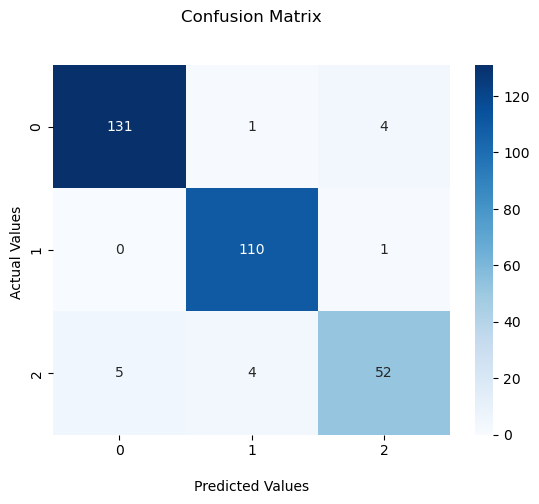

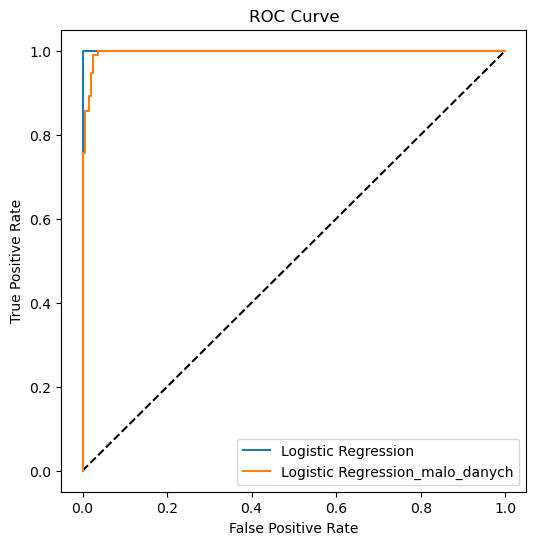

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.990237,0.969931,0.999578,0.990260,0.990253,0.990260
1,Logistic Regression_malo_danych,0.950701,0.969931,0.993088,0.951299,0.950724,0.951299


In [19]:
model_lr_malo_danych = LogisticRegression()
model_lr_malo_danych.fit(X_train_standardized, y_train)

calculate_metrics(model_lr_malo_danych, 'Logistic Regression_malo_danych', X_test_standardized, y_test)

### Komentarz:
Pomimo znaczącego okrojenia danych testowych - model wciąż jest bardzo dobry. Błędnie zaklasyfikował 15 z 308 przypadków. Zatem który model wybrać? W takim przypadku można podejść do tematu biznesowo: należy obliczyć koszty 15 błędnie sklasyfikowanych przypadków i porównać je do kosztu pozyskania danych. Na potrzeby tego zadania (i chęci przeżycia przygody) uznaję, że zależy nam na wytrenowaniu modelu z mniejszej ilości danych (ganianie pingwinów i ich mierzenie może być kosztownym przedsięwzięciem).  Od tej pory będę trenowała modele na podstawie dwóch cech: 'CulmenLength' oraz 'FlipperLength', a obserwacji treningowych jest 34.

Trenowała modele będę na dwa sposoby - z ustalonymi odgórnie hiperparametrami oraz z hiperparametrami wyliczonymi przy pomocy GridSearchCV.

## KNN (K Nearest Neighbours) – K najbliższych sąsiadów

C:\Users\kulin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kulin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim


Best hyperparameter: {'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.95      0.99      0.97       111
           2       0.91      0.85      0.88        61

    accuracy                           0.95       308
   macro avg       0.94      0.93      0.94       308
weighted avg       0.95      0.95      0.95       308



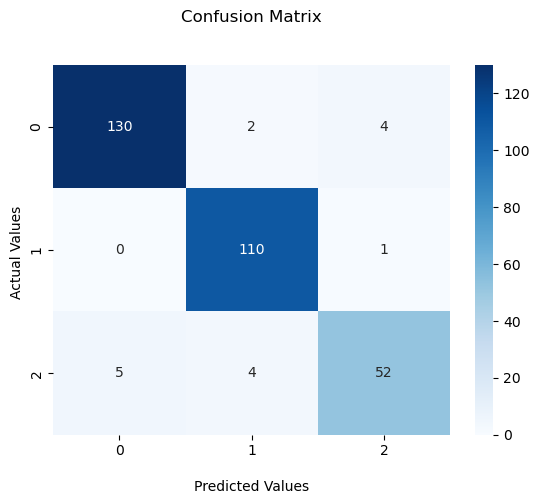

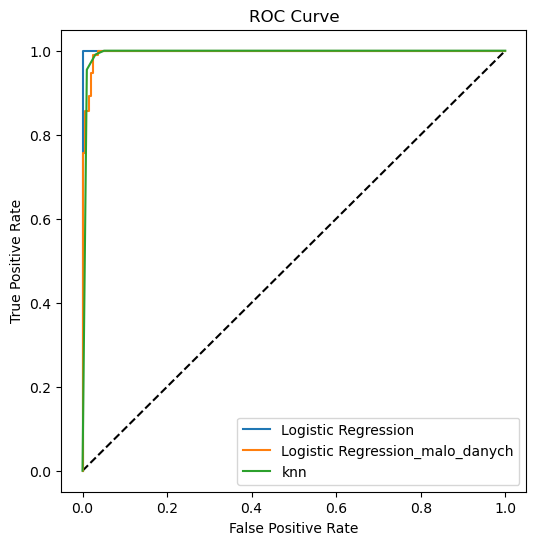

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},
C:\Users\kulin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kulin\anaconda3\lib\

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.95      0.99      0.97       111
           2       0.91      0.85      0.88        61

    accuracy                           0.95       308
   macro avg       0.94      0.93      0.94       308
weighted avg       0.95      0.95      0.95       308



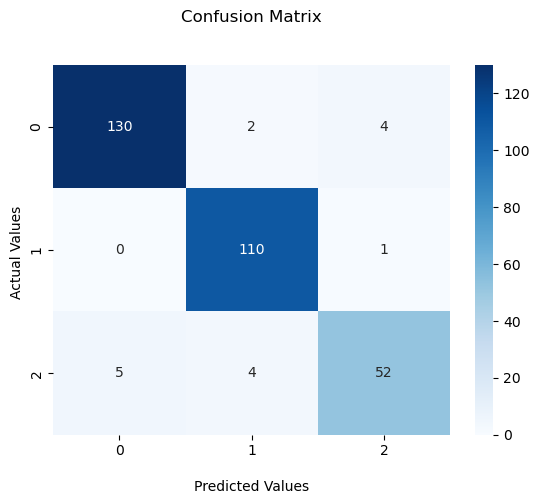

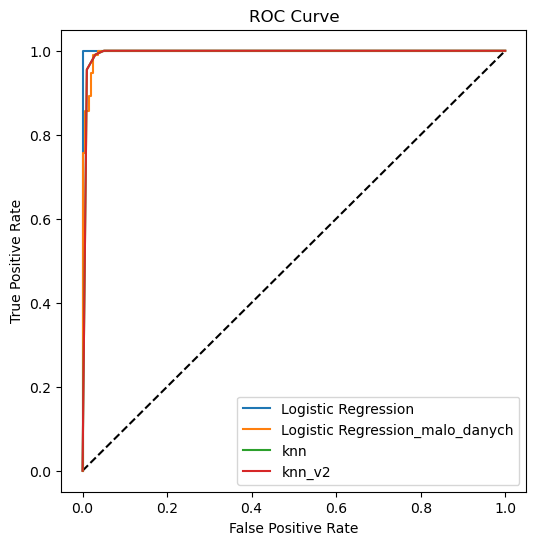

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.990237,0.969931,0.999578,0.990260,0.990253,0.990260
1,Logistic Regression_malo_danych,0.950701,0.969931,0.993088,0.951299,0.950724,0.951299
2,knn,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
3,knn_v2,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052


In [20]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= 3)
model_knn.fit(X_train_standardized, y_train)

from sklearn.model_selection import GridSearchCV
random_knn = KNeighborsClassifier()
params_knn = {'n_neighbors': [3, 5, 10, 20]}
knn_gridsearch = GridSearchCV(random_knn,
                             params_knn,
                             scoring='f1_weighted')
knn_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', knn_gridsearch.best_params_)
model_knn_v2 = knn_gridsearch.best_estimator_

calculate_metrics(model_knn, 'knn', X_test_standardized, y_test)
calculate_metrics(model_knn_v2, 'knn_v2', X_test_standardized, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 3}
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       136
           1       0.94      0.99      0.96       111
           2       0.76      0.90      0.83        61

    accuracy                           0.92       308
   macro avg       0.90      0.92      0.91       308
weighted avg       0.93      0.92      0.92       308



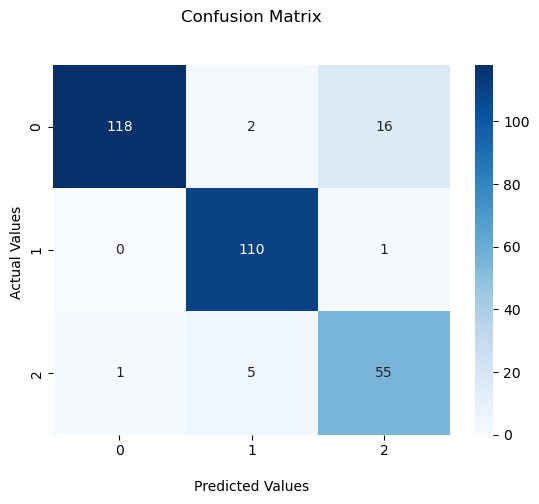

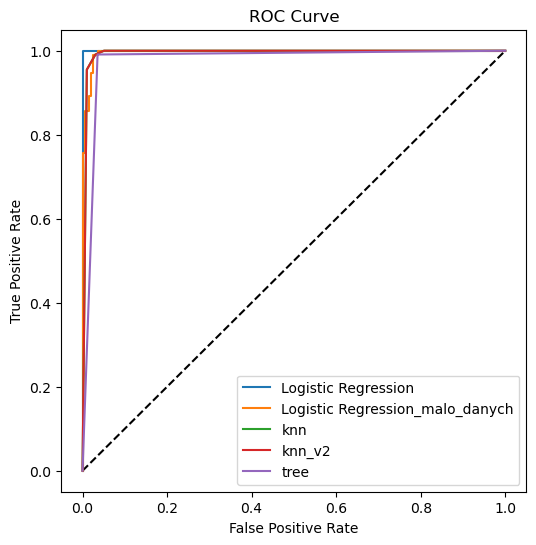

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


              precision    recall  f1-score   support

           0       0.99      0.87      0.93       136
           1       0.94      0.99      0.96       111
           2       0.76      0.90      0.83        61

    accuracy                           0.92       308
   macro avg       0.90      0.92      0.91       308
weighted avg       0.93      0.92      0.92       308



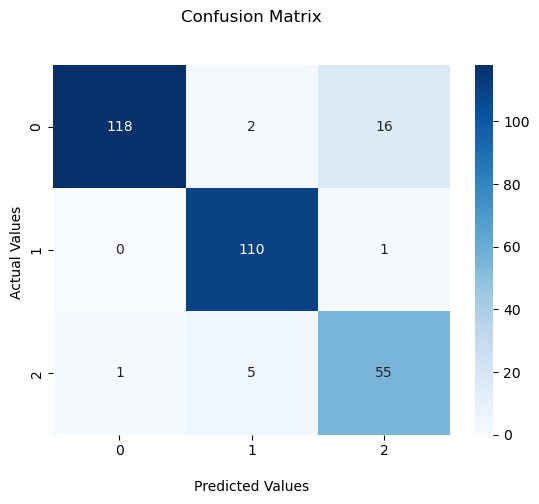

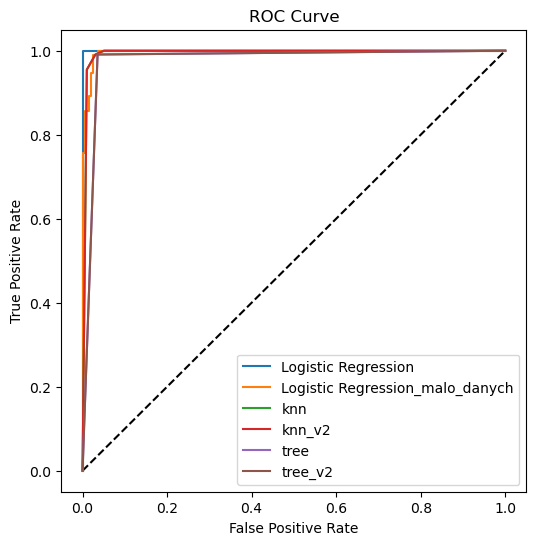

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.990237,0.969931,0.999578,0.990260,0.990253,0.990260
1,Logistic Regression_malo_danych,0.950701,0.969931,0.993088,0.951299,0.950724,0.951299
2,knn,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
3,knn_v2,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
4,tree,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
5,tree_v2,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831


In [21]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
model_tree.fit(X_train, y_train)


random_tree = DecisionTreeClassifier()
params_tree = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
tree_gridsearch = GridSearchCV(random_tree,
                             params_tree,
                             scoring='f1_weighted',
                             cv=5,
                             verbose=10, n_jobs=-1)
tree_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', tree_gridsearch.best_params_)
model_tree_v2 = tree_gridsearch.best_estimator_

calculate_metrics(model_tree, 'tree', X_test, y_test)
calculate_metrics(model_tree_v2, 'tree_v2', X_test, y_test)

## SVM (Support Vector Machines) - Maszyna wektorów nośnych

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best hyperparameter: {'C': 0.5}
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.92      0.99      0.96       111
           2       0.92      0.80      0.86        61

    accuracy                           0.94       308
   macro avg       0.94      0.92      0.93       308
weighted avg       0.94      0.94      0.94       308



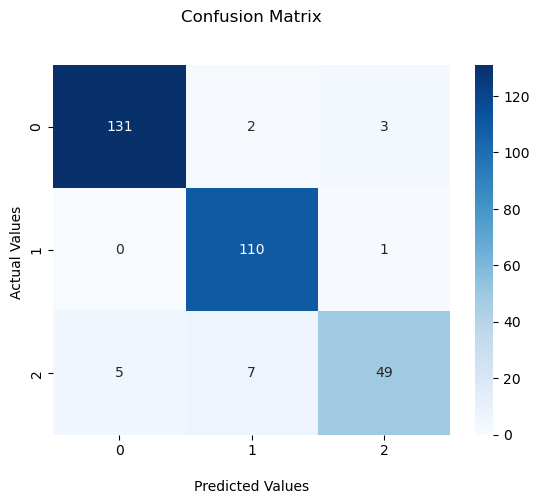

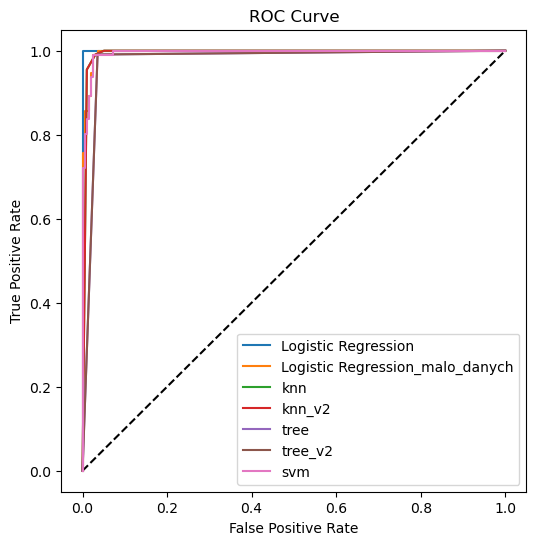

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       136
           1       0.95      0.99      0.97       111
           2       0.93      0.82      0.87        61

    accuracy                           0.95       308
   macro avg       0.94      0.93      0.93       308
weighted avg       0.95      0.95      0.95       308



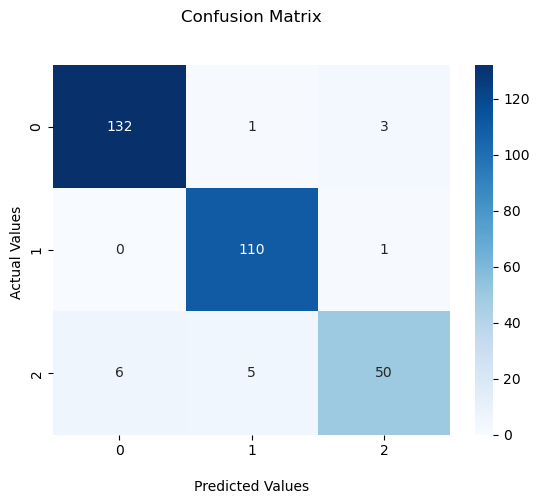

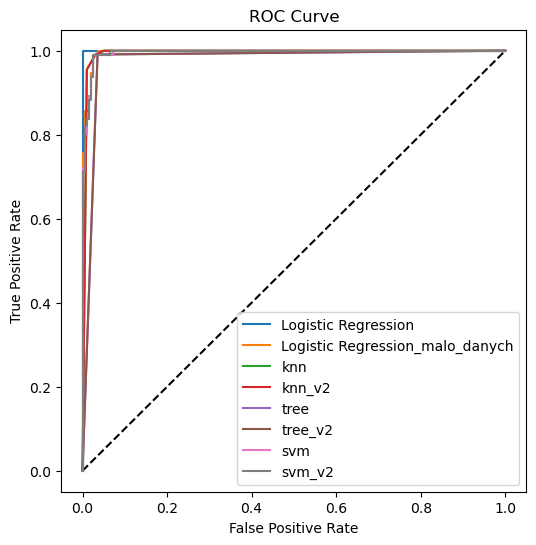

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.990237,0.969931,0.999578,0.990260,0.990253,0.990260
1,Logistic Regression_malo_danych,0.950701,0.969931,0.993088,0.951299,0.950724,0.951299
2,knn,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
3,knn_v2,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
4,tree,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
5,tree_v2,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
6,svm,0.940300,0.969931,0.988005,0.941558,0.941563,0.941558
7,svm_v2,0.946939,0.969931,0.988662,0.948052,0.947490,0.948052


In [22]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', C = 0.3, probability=True)
model_svm.fit(X_train_standardized, y_train)

random_svm = SVC(probability=True)
params_svm = {'C' : [0.1, 0.3, 0.5, 0.7,1.0]}
svm_gridsearch = GridSearchCV(random_svm,
                             params_svm,
                             scoring='f1_weighted',
                             cv=5,
                             verbose=10, n_jobs=-1)
svm_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', svm_gridsearch.best_params_)
model_svm_v2 = svm_gridsearch.best_estimator_

calculate_metrics(model_svm, 'svm', X_test_standardized, y_test)
calculate_metrics(model_svm_v2, 'svm_v2', X_test_standardized, y_test)


## Random Forest – Las drzew decyzyjnych

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 3}
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       136
           1       0.94      0.97      0.96       111
           2       0.88      0.85      0.87        61

    accuracy                           0.94       308
   macro avg       0.93      0.92      0.93       308
weighted avg       0.94      0.94      0.94       308



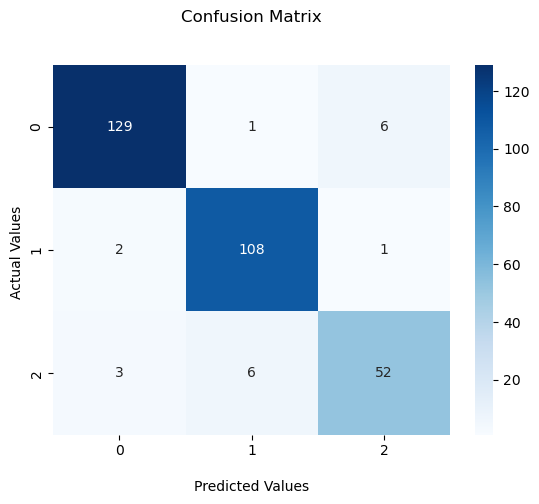

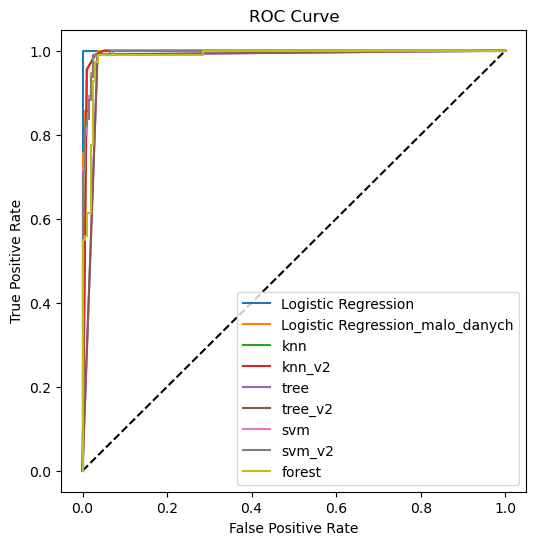

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


              precision    recall  f1-score   support

           0       0.98      0.95      0.96       136
           1       0.95      0.99      0.97       111
           2       0.88      0.87      0.88        61

    accuracy                           0.95       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.95      0.95      0.95       308



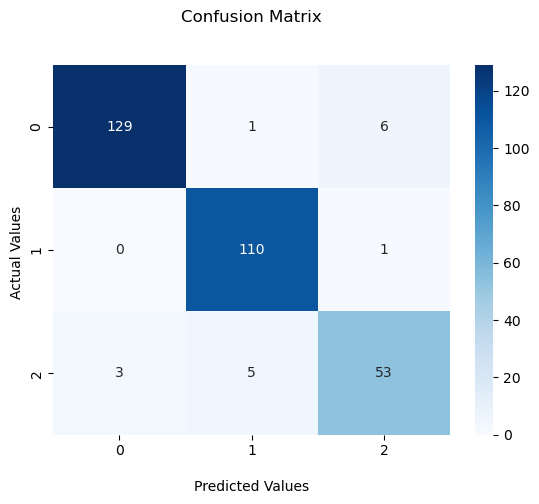

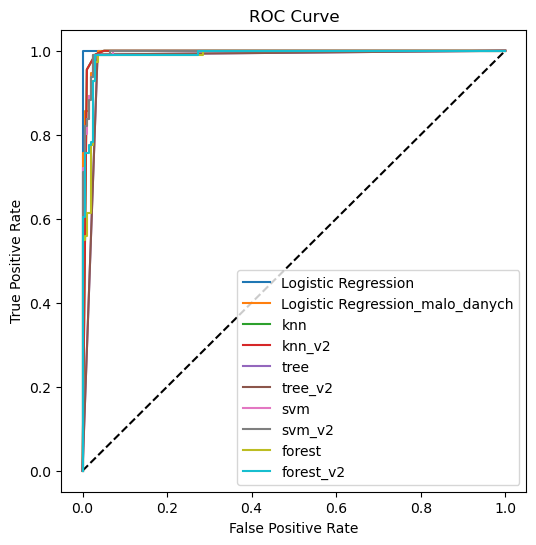

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.990237,0.969931,0.999578,0.990260,0.990253,0.990260
1,Logistic Regression_malo_danych,0.950701,0.969931,0.993088,0.951299,0.950724,0.951299
2,knn,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
3,knn_v2,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
4,tree,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
5,tree_v2,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
6,svm,0.940300,0.969931,0.988005,0.941558,0.941563,0.941558
7,svm_v2,0.946939,0.969931,0.988662,0.948052,0.947490,0.948052
8,forest,0.938022,0.969931,0.977980,0.938312,0.938089,0.938312
9,forest_v2,0.947859,0.969931,0.980544,0.948052,0.948218,0.948052


In [23]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf= 3)
model_forest.fit(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_forest = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
forest_gridsearch = GridSearchCV(random_forest,
                             params_forest,
                             scoring='f1_weighted',
                             cv=5,
                             verbose=10, n_jobs=-1)
forest_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', forest_gridsearch.best_params_)
model_forest_v2 = forest_gridsearch.best_estimator_

calculate_metrics(model_forest, 'forest', X_test, y_test)
calculate_metrics(model_forest_v2, 'forest_v2', X_test, y_test)

## Boosting — AdaBoost

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.94      0.99      0.96       111
           2       0.92      0.89      0.90        61

    accuracy                           0.95       308
   macro avg       0.95      0.94      0.95       308
weighted avg       0.95      0.95      0.95       308



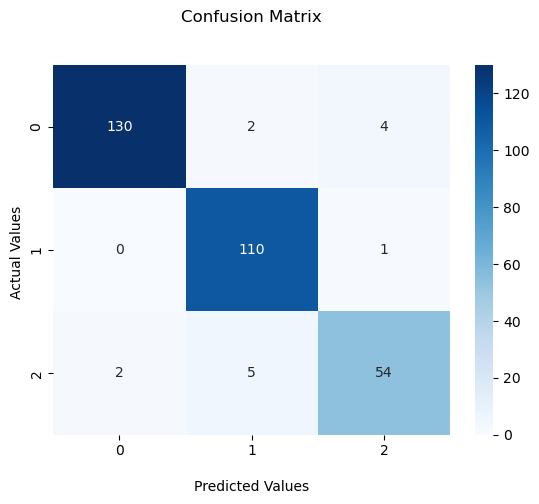

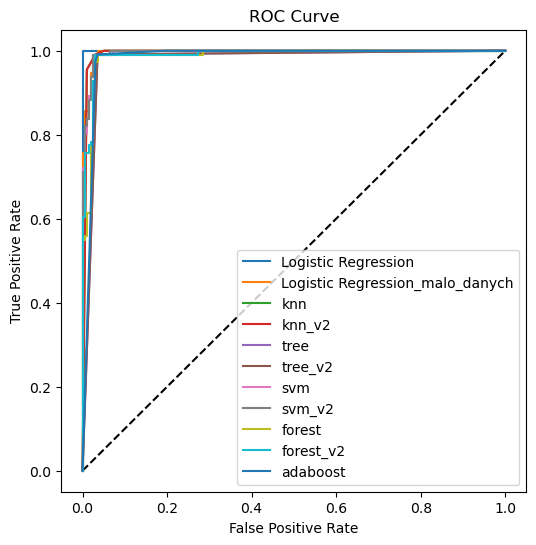

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.990237,0.969931,0.999578,0.990260,0.990253,0.990260
1,Logistic Regression_malo_danych,0.950701,0.969931,0.993088,0.951299,0.950724,0.951299
2,knn,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
3,knn_v2,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
4,tree,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
5,tree_v2,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
6,svm,0.940300,0.969931,0.988005,0.941558,0.941563,0.941558
7,svm_v2,0.946939,0.969931,0.988662,0.948052,0.947490,0.948052
8,forest,0.938022,0.969931,0.977980,0.938312,0.938089,0.938312
9,forest_v2,0.947859,0.969931,0.980544,0.948052,0.948218,0.948052


In [24]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)

calculate_metrics(model_adaboost, 'adaboost', X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.94      0.99      0.96       111
           2       0.92      0.89      0.90        61

    accuracy                           0.95       308
   macro avg       0.95      0.94      0.95       308
weighted avg       0.95      0.95      0.95       308



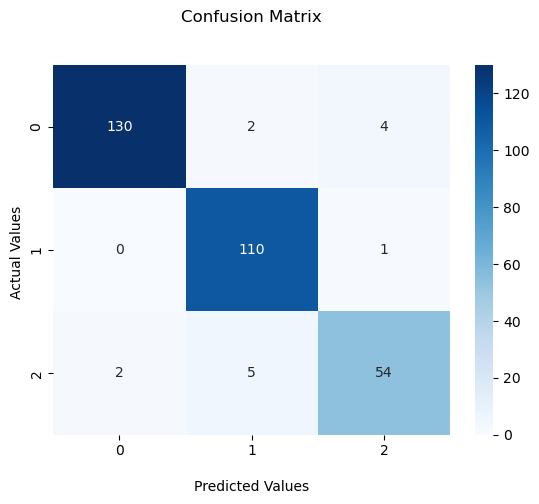

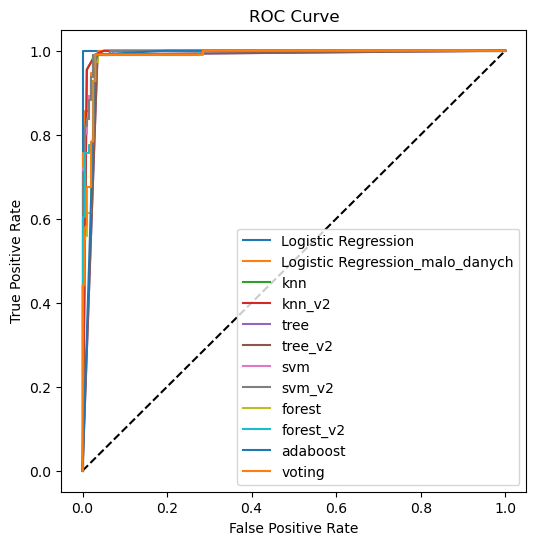

C:\Users\kulin\AppData\Local\Temp\ipykernel_14740\1760910546.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'F1_score train': f1_metric_train, 'AUC': auc_metric,'Accuracy': accuracy_metric, 'Precision': precision_metric,'Recall': recall_metric},


,Model,F1_score,F1_score train,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.990237,0.969931,0.999578,0.990260,0.990253,0.990260
1,Logistic Regression_malo_danych,0.950701,0.969931,0.993088,0.951299,0.950724,0.951299
2,knn,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
3,knn_v2,0.947466,0.969931,0.985025,0.948052,0.947632,0.948052
4,tree,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
5,tree_v2,0.920205,0.971062,0.960929,0.918831,0.927965,0.918831
6,svm,0.940300,0.969931,0.988005,0.941558,0.941563,0.941558
7,svm_v2,0.946939,0.969931,0.988662,0.948052,0.947490,0.948052
8,forest,0.938022,0.969931,0.977980,0.938312,0.938089,0.938312
9,forest_v2,0.947859,0.969931,0.980544,0.948052,0.948218,0.948052


In [25]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')
model_voting.fit(X_train, y_train)

calculate_metrics(model_voting, 'voting', X_test, y_test)

# Podsumowanie:

Jak na tak małą ilość danych treningowych (34 obserwacje o dwóch cechach) klasyfikacja przebiegała dobrze.
Wszystkie modele uważam za dobre, żaden nie został przetrenowany. Najlepiej wypadły modele voting i adaboost (F1 dla testowych =0.954). Zaklasyfikowały one źle 14 z 342 obserwacji (co stanowi 4% wszystkich obserwacji). Niewiele za nimi jest model logistic regression.
Najwięcej błędnie przyporządkowanych obserwacji miał model tree i było to 25 błędnych z 342 wszystkich obserwacji (co stanowi 7% wszystkich obserwacji).